In [25]:
from sklearn.metrics import mean_squared_error

from gp.program import Program
from gp.selection import tournament_selection
from gp.variation import crossover

import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random

In [26]:
# Dataset Generation
X = np.linspace(-2, 2, 20).reshape(-1, 1)
print(X.shape)
y = np.sin(X)

(20, 1)


In [27]:
# Population Generation
population = [Program(num_features=1, num_outputs=1, depth=random.randint(3, 6)) for i in range(500)]

for program in population[0:5]:
    print(program)
    print()

(mul X0 (div (sub 6.09 0.03) X0))

(add (div -6.47 X0) (sub 0.36 -0.59))

(div (sub -7.17 X0) (mul (mul 8.06 -6.89) (sub (mul -4.28 X0) 9.21)))

(add (add (mul 0.03 X0) (add -1.85 3.50)) (sub 4.26 X0))

(mul (mul X0 -9.36) X0)



In [43]:
# Training Loop
num_epochs = 100

for epoch in tqdm.trange(num_epochs):
    reproduced, crossed_over, mutated = [], [], []
    while len(reproduced) < len(population) * 0.10:
        reproduced.append(tournament_selection(population, X, y, tournament_size=4))
    while len(crossed_over) < len(population) * 0.90:
        parent1 = tournament_selection(population, X, y, tournament_size=4)
        parent2 = tournament_selection(population, X, y, tournament_size=4)
        child1, child2 = crossover(parent1, parent2)
        crossed_over.extend([child1, child2])
    population = reproduced + crossed_over

100%|██████████| 100/100 [18:05<00:00, 10.86s/it]


In [5]:
# Pareto Front
#plt.title("Solution Space")
#plt.scatter([ program.complexity() for program in parents], errors)
#plt.xlabel("Complexity")
#plt.ylabel("Errors")
#plt.show()

In [6]:
# Show solutions
#for solution, error in sorted(zip(parents, errors), key=lambda x: x[1], reverse=True):
#    print(solution.complexity(),":", solution, error)

0.005682991397414807
(div (add X0 (add (div (div X0 5.18) (mul (add X0 (add X0 (mul X0 (add (div (div (add X0 X0) 5.18) (mul (add X0 (add X0 (mul X0 (add (mul 0.68 (sub (add X0 (mul (sub (add X0 X0) X0) (sub X0 X0))) (div (div X0 5.18) 6.23))) X0)))) (add (add (add X0 (mul (add X0 (add X0 (mul X0 (add (mul 0.68 (sub (add X0 (mul X0 (sub X0 X0))) (add X0 (mul X0 (add (mul 0.68 (sub (add X0 (mul (sub (add (div (mul 0.68 (sub (add X0 (mul (sub (add (div (add X0 (mul X0 X0)) (add X0 X0)) 0.68) X0) (div (div (div X0 6.23) 6.23) X0))) (div (div X0 5.18) 6.23))) (add X0 X0)) X0) (add (add X0 (mul X0 (add (mul 0.68 X0) X0))) (mul X0 X0))) (sub X0 X0))) (div (div X0 5.18) 6.23))) X0))))) X0)))) (add (add X0 X0) X0))) X0) X0))) (add (div (div (div X0 6.23) 6.23) (mul (add X0 (add X0 (mul X0 X0))) (add (div (div (div (sub X0 (add (add X0 X0) X0)) 6.23) 6.23) (div X0 (add (div (add X0 (add X0 (div (sub 6.23 (add (add X0 X0) X0)) 6.23))) (add X0 X0)) (add (div (div (div (div (sub 6.23 (add (add X0 

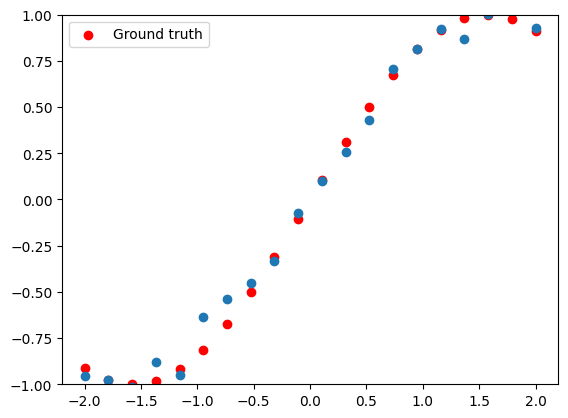

In [45]:
# Ground-truth function
plt.scatter(X, y, color='red', label='Ground truth')

# Sort programs by error
for solution in sorted(population, key=lambda program: mean_squared_error(program(X), y), reverse=False)[0:1]:
    print(mean_squared_error(solution(X), y))
    print(solution)
    plt.scatter(X, solution(X))

plt.legend()
plt.ylim(-1, 1)
plt.show()